<a href="https://colab.research.google.com/github/YukiNoji3/SampleCode/blob/master/colab_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory Tips

Google Colaboratory(Google Colab)のTips集


## スペック確認

OSバージョン

In [0]:
!cat /etc/issue

Ubuntu 18.04.3 LTS \n \l



容量確認

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1        75G   37G   38G  50% /opt/bin
shm             5.9G  4.0K  5.9G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


メモリ確認

In [0]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        566M         10G        900K        2.0G         11G
Swap:            0B          0B          0B


CPUのスペック確認

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.172
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 400

GPUのスペック確認
（以下は ランタイム -> ランタイムのタイプを変更 -> ハードウェアアクセラレーションをGPUに設定して確認する）

In [0]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla P4
IRQ:   		 35
GPU UUID: 	 GPU-85622cd4-8a01-7c4e-1b9a-ed1f27f8f4bd
Video BIOS: 	 86.04.8c.00.10
Bus Type: 	 PCI
DMA Size: 	 47 bits
DMA Mask: 	 0x7fffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9179762919197259155, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12772276294880708987
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6846415388926803111
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7470045594
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2941397237615016041
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

起動時間確認。Google Colabの時間制約に関しては、以下記事参照

[【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)

In [0]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.00133137days (115.03sec)


## マジックコマンド

最初に!をつけることで、Linuxのコマンドが使用可能。

cdは!でなく%をつける

ディレクトリ作成

In [0]:
!mkdir test

ファイル確認

In [0]:
!ls

ディレクトリ移動

In [0]:
%cd test

ファイルの作成

In [0]:
!echo 'test' > test.txt

## ライブラリ

ライブラリのバージョン指定のインストール。
ディープラーニング関係のソフトはバージョン依存が激しいので、バージョン指定を使うのがベター。

In [0]:
!pip install tensorflow==1.8.0

TensorFlowは、1.x系と2.x系を以下のコマンドで切り替え可能。ランタイムを起動したら、以下のどちらかを最初に実行しておくのが良い。

2.x系を指定

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.0


1.x系を指定

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


pythonのバージョン確認

In [0]:
import platform
print("python " + platform.python_version())

python 3.6.9


インストールされている全てのライブラリとバージョンを確認

In [0]:
import pkg_resources
for dist in pkg_resources.working_set:
  print(dist)

zmq 0.0.0
zipp 3.1.0
zict 1.0.0
yellowbrick 0.9.1
xlwt 1.3.0
xlrd 1.1.0
xgboost 0.90
xarray 0.14.1
wrapt 1.11.2
wordcloud 1.5.0
widgetsnbextension 3.5.1
wheel 0.34.2
Werkzeug 1.0.0
webencodings 0.5.1
wcwidth 0.1.8
wasabi 0.6.0
vega-datasets 0.8.0
urllib3 1.24.3
uritemplate 3.0.1
umap-learn 0.3.10
tzlocal 1.5.1
typing 3.6.6
typing-extensions 3.6.6
tweepy 3.6.0
traitlets 4.3.3
tqdm 4.28.1
tornado 4.5.3
torchvision 0.5.0
torchtext 0.3.1
torchsummary 1.5.1
torch 1.4.0
toolz 0.10.0
thinc 7.0.8
Theano 1.0.4
tflearn 0.3.2
textgenrnn 1.4.1
textblob 0.15.3
text-unidecode 1.3
testpath 0.4.4
terminado 0.8.3
termcolor 1.1.0
tensorflow 1.15.0
tensorflow-probability 0.7.0
tensorflow-privacy 0.2.2
tensorflow-metadata 0.21.1
tensorflow-hub 0.7.0
tensorflow-gan 2.0.0
tensorflow-estimator 1.15.1
tensorflow-datasets 2.0.0
tensorboardcolab 0.0.22
tensorboard 1.15.0
tensor2tensor 1.14.1
tblib 1.6.0
tabulate 0.8.6
tables 3.4.4
sympy 1.1.1
statsmodels 0.10.2
stable-baselines 2.2.1
srsly 1.0.1
sqlparse 0.3.0


バージョンを確認したいライブラリのリストを作成

In [0]:
pkglist = ['numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'pandas']

バージョン確認

In [0]:
import pkg_resources

for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

seaborn 0.10.0
scikit-learn 0.22.1
pandas 0.25.3
numpy 1.17.5
matplotlib 3.1.3


## データのアップロード・ダウンロード

Google Colab上にデータをアップロード

In [0]:
from google.colab import files
uploaded = files.upload()

Google Colab上のデータのダウンロード
（以下は、`test.txt` というファイルをダウンロード）

In [0]:
from google.colab import files
files.download('test.txt')

## Google Driveのデータを使用する

以下コマンドを実行します

すると以下のような表示がされるので、まずは1行目のアドレスのリンクをクリックしてください。

```
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=xxxxx

Enter your authorization code:

```

リンク先で、Googleアカウントを選択する画面が出てくるので、使用したいアカウントを選択します。

その後、Google ColabにGoogle Driveのアクセスの許可を与えて良いかの確認画面が出てくるので「許可」をクリックします。

すると、「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」という画面と共に、コードが表示されるので、先ほど表示されたテキストの2行目「Enter your authorization code:」に入力してコードを入力してください。


In [0]:
from google.colab import drive
drive.mount('/content/drive')

これでGoogle Driveが `/content/drive`以下にマウントされました。

My Driveのファイルを、例えば以下コマンドで確認できます。

In [0]:
!ls '/content/drive/My Drive'

ファイルが見えたら、後はcpコマンドで直接Google ColabとGooogle Drive間でデータをやりとりできます。

## 画像の表示

サンプル画像をダウンロード

In [0]:
!wget -O test.jpg https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg

--2020-03-11 02:53:45--  https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 369038 (360K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 360.39K  --.-KB/s    in 0.007s  

2020-03-11 02:53:45 (54.1 MB/s) - ‘test.jpg’ saved [369038/369038]



IPython.displayを使う方法

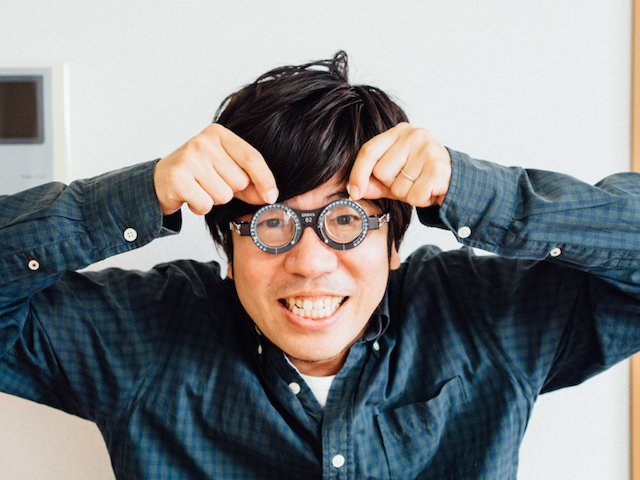

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('test.jpg'))

matplotlibを使う方法

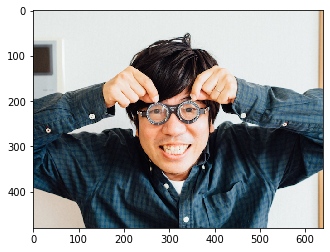

In [0]:
from PIL import Image
from matplotlib.pyplot import imshow

img = Image.open("test.jpg")
imshow(img)
#imshow(img, cmap='gray')

枠線を消したい場合は以下

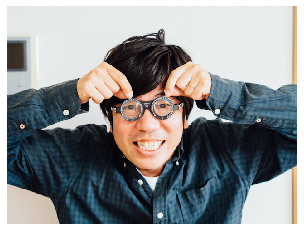

In [0]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.axis('off')
plt.show()

## matplotlibで日本語使用

pip で日本語化モジュールをインストール

In [0]:
! pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 18.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=e4bf5864a93a6b10621a59de9a28b6b425047d99f6b4db351394d31175ced854
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


簡単なグラフを描く

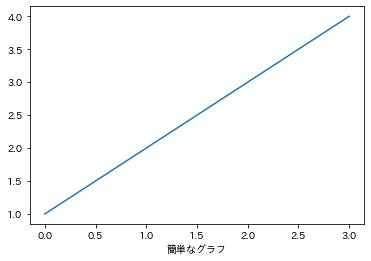

In [0]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # <- これ

plt.plot([1, 2, 3, 4])
plt.xlabel('簡単なグラフ')
plt.show()

## 参考リンク

[【秒速で無料GPUを使う】TensorfFow/Keras/PyTorch/Chainer環境構築 on Colaboratory](https://qiita.com/tomo_makes/items/f70fe48c428d3a61e131)

[【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)